In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from matplotlib import colormaps as cmaps

# Read the CSV file into 'flu' DataFrame
flu = pd.read_csv("Resources/VIW_FNT.csv")
# Read the populations DataFrame (to use to calculate per capita rate)
populations_one_column_df = pd.read_csv("Resources/populations_one_column.csv")

# Convert 'ISO_WEEKSTARTDATE' to datetime format
flu['ISO_WEEKSTARTDATE'] = pd.to_datetime(flu['ISO_WEEKSTARTDATE'], format='%d/%m/%Y')

# Extract the month and create a new field 'Month' & one for year&month
flu['Month'] = flu['ISO_WEEKSTARTDATE'].dt.month
flu['YearMonth'] = flu['ISO_WEEKSTARTDATE'].dt.to_period('M')

# Filter data for the desired year range (2015-2023)
flu_filtered = flu[(flu['ISO_YEAR'] >= 2017) & (flu['ISO_YEAR'] <= 2022)]

# Merge 'flu_filtered' DataFrame with 'populations_one_column_df' based on the common columns
flu_with_population = flu_filtered.merge(populations_one_column_df, 
                                         left_on=['COUNTRY_CODE', 'ISO_YEAR', 'COUNTRY_AREA_TERRITORY'], 
                                         right_on=['Country Code', 'Year', 'Country Name'],
                                         how='left')

# Drop the unnecessary columns from the merge operation
flu_with_population.drop(['Country Code', 'Year', 'Country Name'], axis=1, inplace=True)

# Calculate the number of cases per million population
flu_with_population['Cases_per_Million'] = flu_with_population['INF_ALL'] / (flu_with_population['Population'] / 1000000)

# Display the resulting DataFrame with population information
#print(flu_with_population.head())

#export Dataframe
flu_with_population.to_csv('Resources/flu_with_population.csv',index=True, header=True)

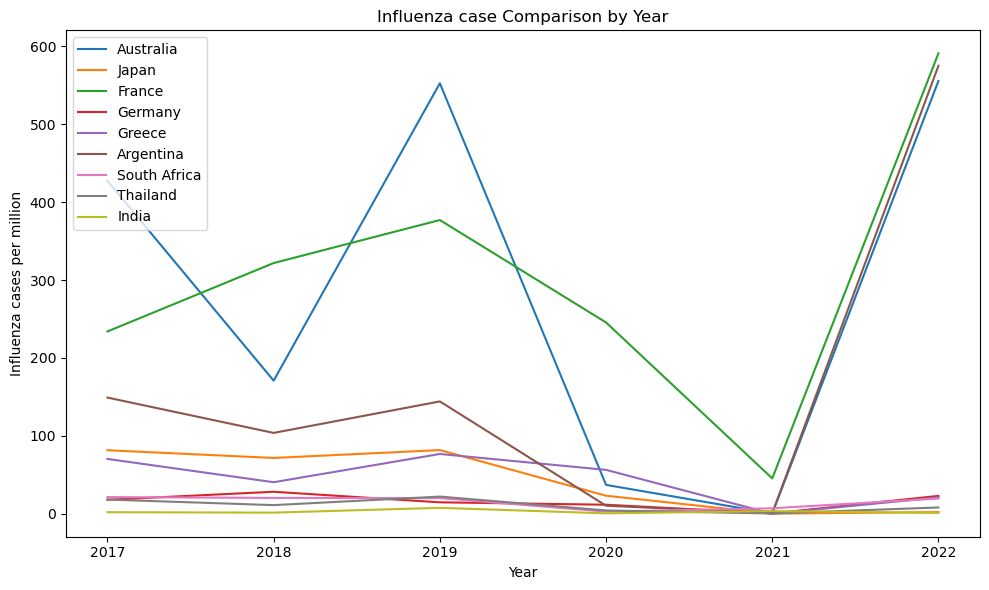

In [2]:
# Group by 'COUNTRY_CODE', 'Year' and sum 'INF_ALL'
sum_by_country_year = flu_with_population.groupby(['COUNTRY_AREA_TERRITORY', 'ISO_YEAR'])['Cases_per_Million'].sum().reset_index()

# Choose five country codes
country_codes = ['Australia', 'Japan', 'France', 'Germany', 'Greece','Argentina', 'South Africa', 'Thailand', 'India']

# Plotting the data
plt.figure(figsize=(10, 6))

for country_code in country_codes:
    # Filter data for the current country
    country_data = sum_by_country_year[sum_by_country_year['COUNTRY_AREA_TERRITORY'] == country_code]
    
    # Plot 'INF_ALL' values for the current country
    plt.plot(country_data['ISO_YEAR'], country_data['Cases_per_Million'], label=country_code)

plt.xlabel('Year')
plt.ylabel('Influenza cases per million')
plt.title('Influenza case Comparison by Year')
plt.legend()
plt.tight_layout()

# Display the graph
plt.show()


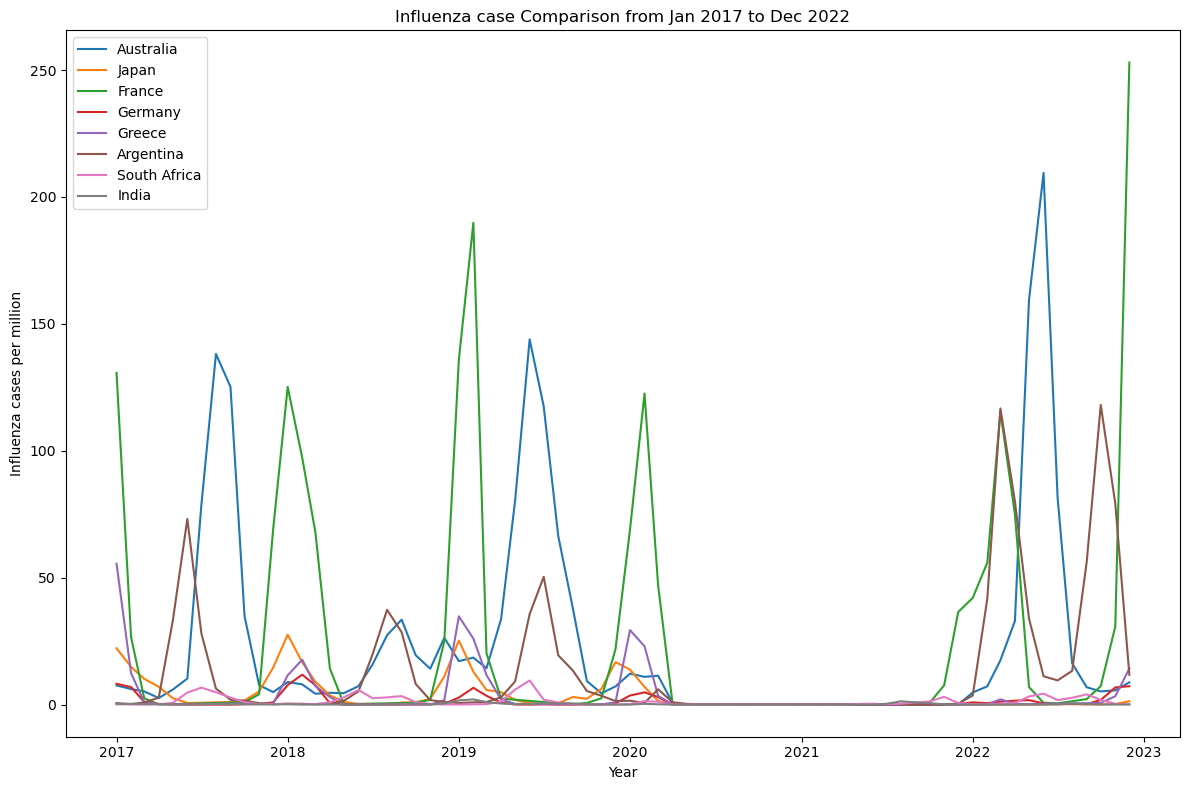

In [3]:
# Group by 'COUNTRY_CODE', 'YearMonth' and sum 'INF_ALL'
sum_by_country = flu_with_population.groupby(['COUNTRY_AREA_TERRITORY', 'YearMonth'])['Cases_per_Million'].sum().reset_index()

# Choose five country codes
country_names = ['Australia', 'Japan', 'France', 'Germany', 'Greece','Argentina', 'South Africa', 'India']

# Filter data for the chosen country codes
sum_by_country_filtered = sum_by_country[sum_by_country['COUNTRY_AREA_TERRITORY'].isin(country_names)].copy()

# Convert 'YearMonth' back to datetime format
sum_by_country_filtered.loc[:, 'YearMonth'] = sum_by_country_filtered['YearMonth'].dt.to_timestamp()

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 8))

for country_names in country_names:
    data = sum_by_country_filtered[sum_by_country_filtered['COUNTRY_AREA_TERRITORY'] == country_names]
    ax.plot(data['YearMonth'], data['Cases_per_Million'], label=country_names)

# Format the x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=0)

plt.xlabel('Year')
plt.ylabel('Influenza cases per million')
plt.title('Influenza case Comparison from Jan 2017 to Dec 2022')
plt.legend()
plt.tight_layout()
plt.show()

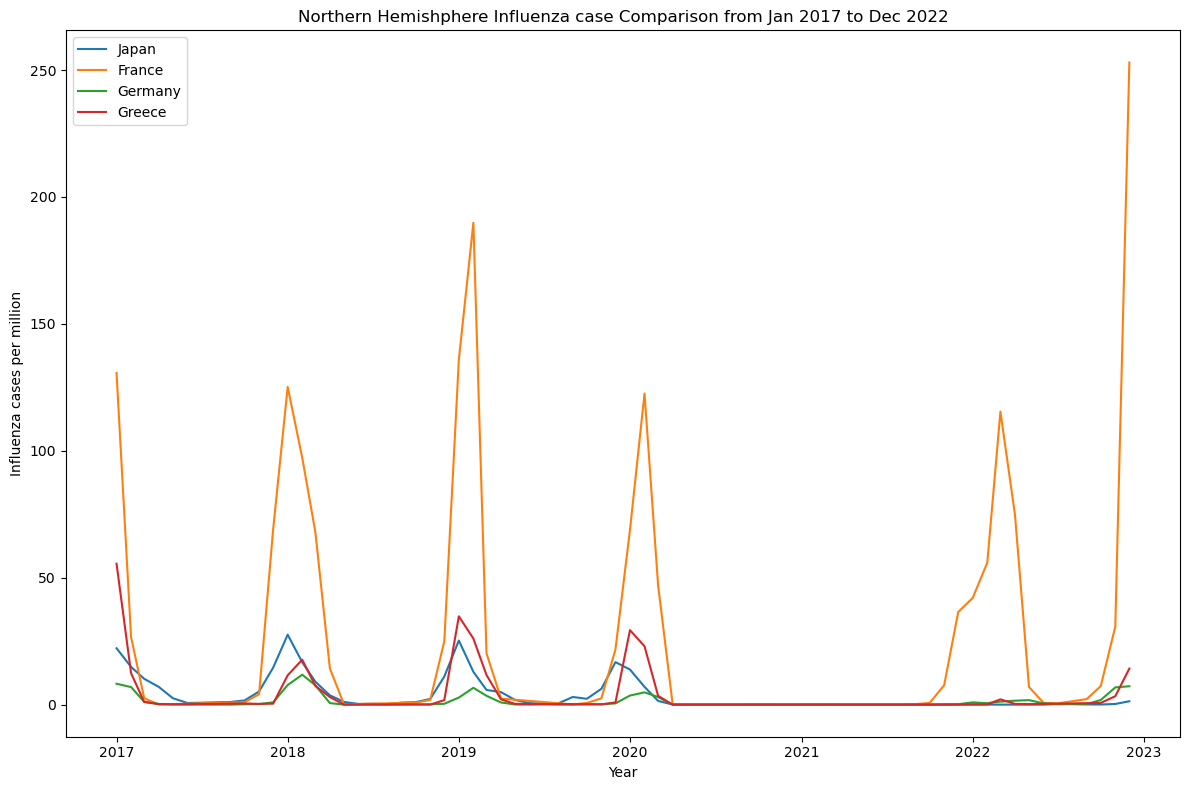

In [9]:
# Group by 'COUNTRY_CODE', 'YearMonth' and sum 'INF_ALL'
sum_by_country = flu_with_population.groupby(['COUNTRY_AREA_TERRITORY', 'YearMonth'])['Cases_per_Million'].sum().reset_index()

# Choose five country codes - Northern hemishpere
country_names = ['Japan', 'France', 'Germany', 'Greece']

# Filter data for the chosen country codes
sum_by_country_filtered = sum_by_country[sum_by_country['COUNTRY_AREA_TERRITORY'].isin(country_names)].copy()

# Convert 'YearMonth' back to datetime format
sum_by_country_filtered.loc[:, 'YearMonth'] = sum_by_country_filtered['YearMonth'].dt.to_timestamp()

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 8))

for country_names in country_names:
    data = sum_by_country_filtered[sum_by_country_filtered['COUNTRY_AREA_TERRITORY'] == country_names]
    ax.plot(data['YearMonth'], data['Cases_per_Million'], label=country_names)

# Format the x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=0)

plt.xlabel('Year')
plt.ylabel('Influenza cases per million')
plt.title('Northern Hemishphere Influenza case Comparison from Jan 2017 to Dec 2022')
plt.legend()
plt.tight_layout()
plt.show()

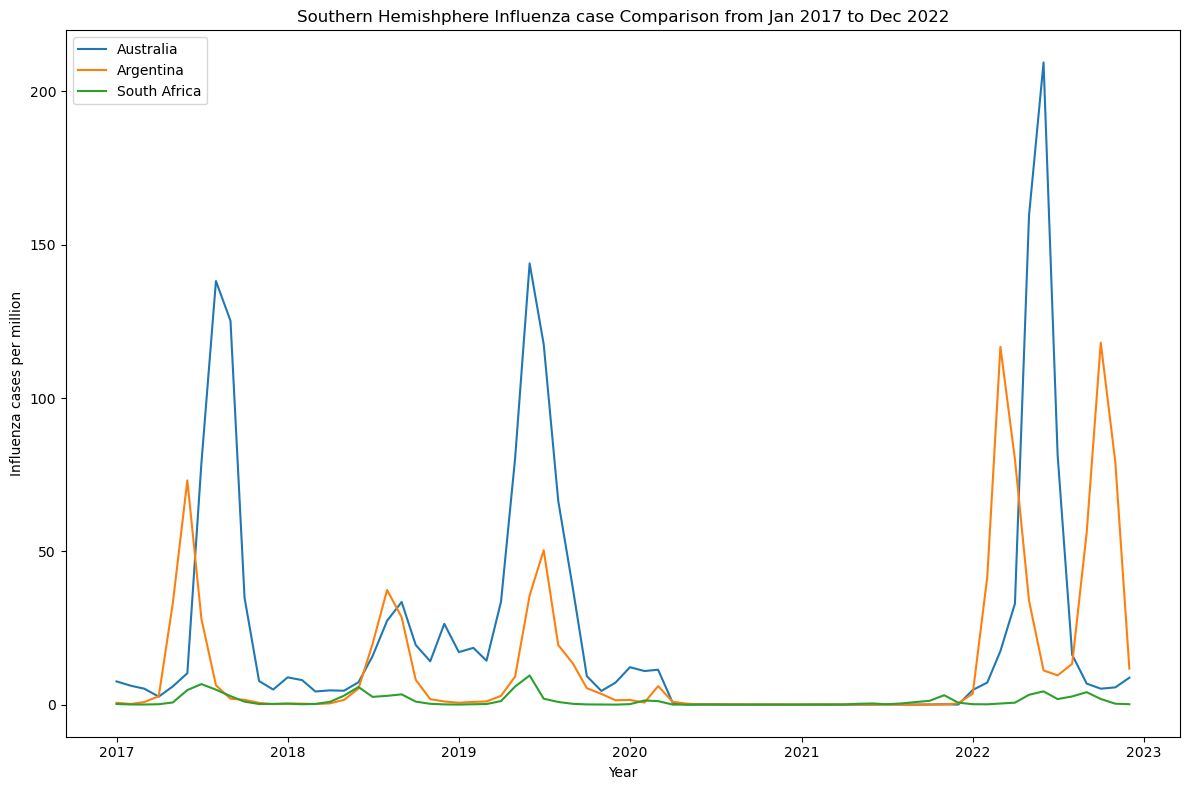

In [10]:
# Group by 'COUNTRY_CODE', 'YearMonth' and sum 'INF_ALL'
sum_by_country = flu_with_population.groupby(['COUNTRY_AREA_TERRITORY', 'YearMonth'])['Cases_per_Million'].sum().reset_index()

# Choose five country codes - Souththern hemishpere
country_names = ['Australia', 'Argentina', 'South Africa']

# Filter data for the chosen country codes
sum_by_country_filtered = sum_by_country[sum_by_country['COUNTRY_AREA_TERRITORY'].isin(country_names)].copy()

# Convert 'YearMonth' back to datetime format
sum_by_country_filtered.loc[:, 'YearMonth'] = sum_by_country_filtered['YearMonth'].dt.to_timestamp()

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 8))

for country_names in country_names:
    data = sum_by_country_filtered[sum_by_country_filtered['COUNTRY_AREA_TERRITORY'] == country_names]
    ax.plot(data['YearMonth'], data['Cases_per_Million'], label=country_names)

# Format the x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=0)

plt.xlabel('Year')
plt.ylabel('Influenza cases per million')
plt.title('Southern Hemishphere Influenza case Comparison from Jan 2017 to Dec 2022')
plt.legend()
plt.tight_layout()
plt.show()

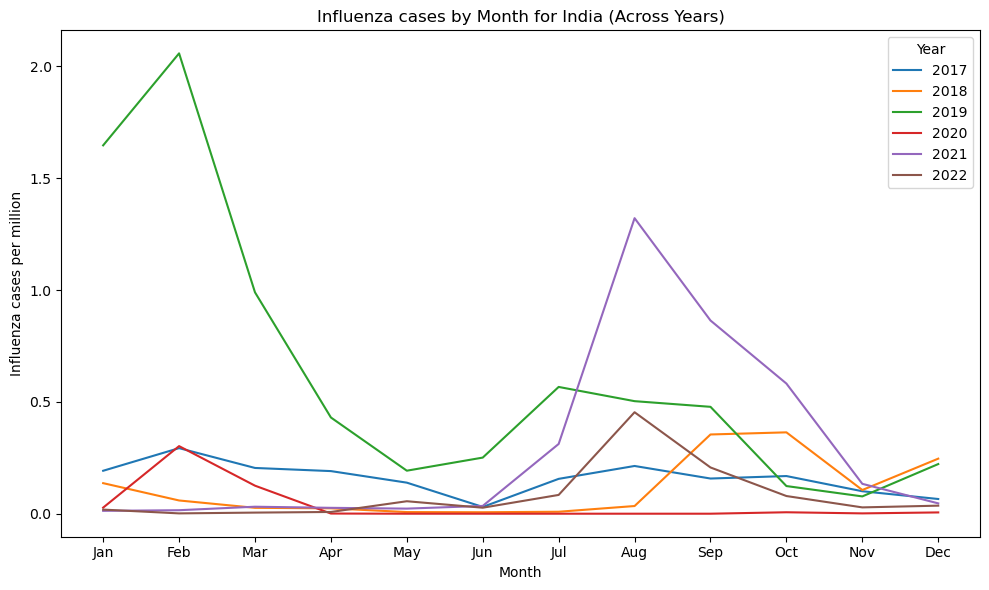

In [4]:
# Choose a single country for the second graph
single_country_name = 'India'

# Filter data for the single country
single_country_data = flu_with_population[flu_with_population['COUNTRY_AREA_TERRITORY'] == single_country_name]

# Group by 'Year' and 'Month' and sum 'INF_ALL'
sum_by_year_month = single_country_data.groupby(['ISO_YEAR', 'Month'])['Cases_per_Million'].sum().reset_index()

# Define a function to map numeric month values to month names
def numeric_to_month_name(numeric_month):
    month_names = {
        1: 'Jan',
        2: 'Feb',
        3: 'Mar',
        4: 'Apr',
        5: 'May',
        6: 'Jun',
        7: 'Jul',
        8: 'Aug',
        9: 'Sep',
        10: 'Oct',
        11: 'Nov',
        12: 'Dec'
    }
    return month_names.get(numeric_month)

# Plotting the data for the single country
plt.figure(figsize=(10, 6))


# Assign different colors to each year
color_palette = cmaps['tab10']

for i, year in enumerate(sum_by_year_month['ISO_YEAR'].unique()):
    year_data = sum_by_year_month[sum_by_year_month['ISO_YEAR'] == year].copy()
    year_data['Month'] = year_data['Month'].map(numeric_to_month_name)
    plt.plot(year_data['Month'], year_data['Cases_per_Million'], label=str(year), color=color_palette(i))

    
plt.xlabel('Month')
plt.ylabel('Influenza cases per million')
plt.title(f'Influenza cases by Month for {single_country_name} (Across Years)')
plt.legend(title='Year')
plt.tight_layout()

# Display the graphs
plt.show()

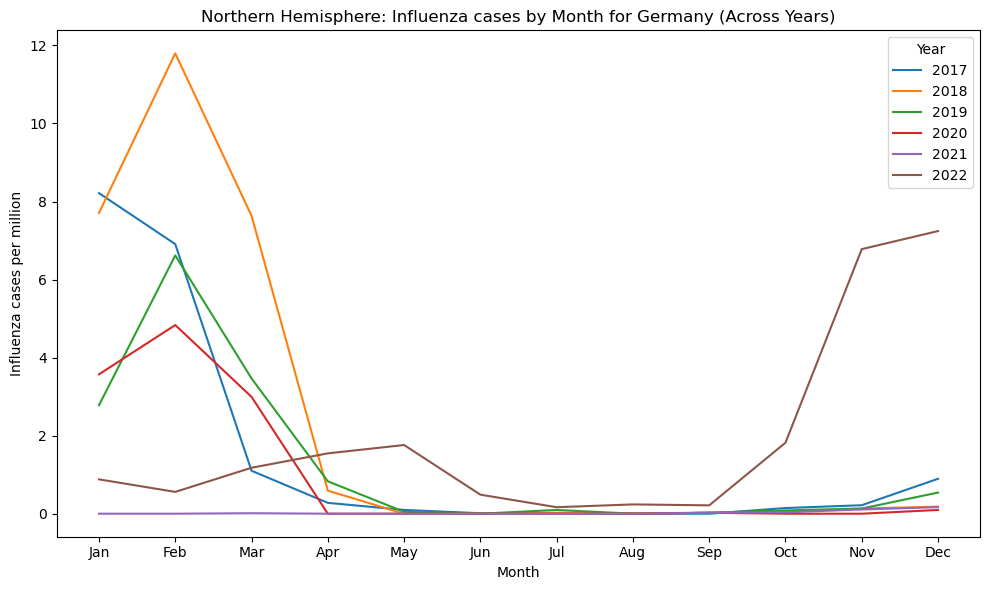

In [5]:
# Northern Hemisphere seasonality cases
nh_country_name = 'Germany'

# Filter data for the listed country(s)
nh_country_data = flu_with_population[flu_with_population['COUNTRY_AREA_TERRITORY'] == nh_country_name]

# Group by 'Year' and 'Month' and sum 'INF_ALL'
sum_by_year_month = nh_country_data.groupby(['ISO_YEAR', 'Month'])['Cases_per_Million'].sum().reset_index()

# Define a function to map numeric month values to month names
def numeric_to_month_name(numeric_month):
    month_names = {
        1: 'Jan',
        2: 'Feb',
        3: 'Mar',
        4: 'Apr',
        5: 'May',
        6: 'Jun',
        7: 'Jul',
        8: 'Aug',
        9: 'Sep',
        10: 'Oct',
        11: 'Nov',
        12: 'Dec'
    }
    return month_names.get(numeric_month)

# Plotting the data for the single country
plt.figure(figsize=(10, 6))


# Assign different colors to each year
color_palette = cmaps['tab10']

for i, year in enumerate(sum_by_year_month['ISO_YEAR'].unique()):
    year_data = sum_by_year_month[sum_by_year_month['ISO_YEAR'] == year].copy()
    year_data['Month'] = year_data['Month'].map(numeric_to_month_name)
    plt.plot(year_data['Month'], year_data['Cases_per_Million'], label=str(year), color=color_palette(i))

    
plt.xlabel('Month')
plt.ylabel('Influenza cases per million')
plt.title(f'Northern Hemisphere: Influenza cases by Month for {nh_country_name} (Across Years)')
plt.legend(title='Year')
plt.tight_layout()

# Display the graphs
plt.show()

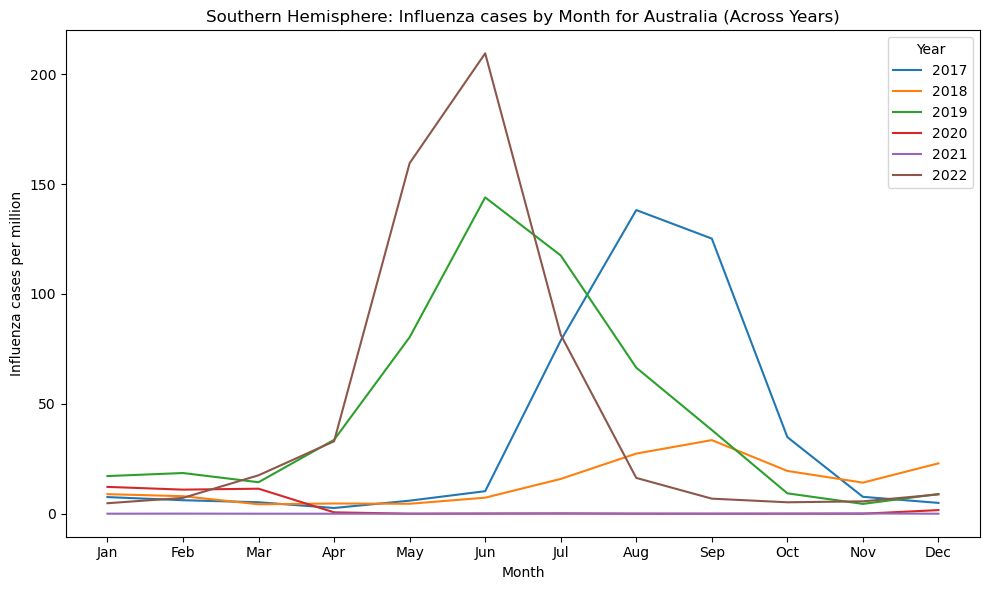

In [6]:
# Southern Hemisphere seasonality cases
sh_country_name = 'Australia'

# Filter data for the listed country(s)
sh_country_data = flu_with_population[flu_with_population['COUNTRY_AREA_TERRITORY'] == sh_country_name]

# Group by 'Year' and 'Month' and sum 'INF_ALL'
sum_by_year_month = sh_country_data.groupby(['ISO_YEAR', 'Month'])['Cases_per_Million'].sum().reset_index()

# Define a function to map numeric month values to month names
def numeric_to_month_name(numeric_month):
    month_names = {
        1: 'Jan',
        2: 'Feb',
        3: 'Mar',
        4: 'Apr',
        5: 'May',
        6: 'Jun',
        7: 'Jul',
        8: 'Aug',
        9: 'Sep',
        10: 'Oct',
        11: 'Nov',
        12: 'Dec'
    }
    return month_names.get(numeric_month)

# Plotting the data for the single country
plt.figure(figsize=(10, 6))


# Assign different colors to each year
color_palette = cmaps['tab10']

for i, year in enumerate(sum_by_year_month['ISO_YEAR'].unique()):
    year_data = sum_by_year_month[sum_by_year_month['ISO_YEAR'] == year].copy()
    year_data['Month'] = year_data['Month'].map(numeric_to_month_name)
    plt.plot(year_data['Month'], year_data['Cases_per_Million'], label=str(year), color=color_palette(i))

    
plt.xlabel('Month')
plt.ylabel('Influenza cases per million')
plt.title(f'Southern Hemisphere: Influenza cases by Month for {sh_country_name} (Across Years)')
plt.legend(title='Year')
plt.tight_layout()

# Display the graphs
plt.show()